In [1]:
import pandas
import matplotlib
import datetime

In [2]:
import coin_repository
import strategies

In [3]:
def get_interests(coin_repository, days=30):
    coin_df = coin_repository.get_data_frame(duration=500)
    closes = coin_df['close']
    interest_dict = {}
    for i in closes.keys():
        j = i - datetime.timedelta(days)
        if closes.get(j) is None:
            continue
        interest = (closes[i] / closes[j])
    #     print(i, closes[i], closes[j], interest)
        interest_dict[i] = interest
        
    return pandas.Series(interest_dict) 
#월별 수익률을 시리즈로 리턴한다.

In [4]:
# 1
# get_interests(coin_repository.CoinRepository('ETH'))

In [5]:
# get_interests(coin_repository.CoinRepository('ETH'), days=31)

In [6]:
# get_interests(coin_repository.CoinRepository('ETH'), 30)

In [7]:
# df = pandas.DataFrame({
#     'ETH': get_interests(coin_repository.CoinRepository('ETH')),
#     'BTC': get_interests(coin_repository.CoinRepository('BTC')),
#     'XRP': get_interests(coin_repository.CoinRepository('XRP')),
#     'BCH': get_interests(coin_repository.CoinRepository('BCH')),
#     'EOS': get_interests(coin_repository.CoinRepository('EOS')),
#     'XLM': get_interests(coin_repository.CoinRepository('XLM')),
#     'LTC': get_interests(coin_repository.CoinRepository('LTC')),
#     'ADA': get_interests(coin_repository.CoinRepository('ADA')),
#     'MIOTA': get_interests(coin_repository.CoinRepository('MIOTA')),
#     'USDT': get_interests(coin_repository.CoinRepository('USDT'))
# })

In [8]:
import numpy

# coins = ['ETH', 'BTC', 'XRP']
coins = ['ETH', 'BTC', 'XRP', 'BCH', 'EOS', 'XLM', 'LTC', 'ADA', 'MIOTA', 'USDT']

coin_dict = {}

for coin in coins:
    coin_dict[coin] = get_interests(coin_repository.CoinRepository(coin))
df = pandas.DataFrame(coin_dict)
# print(df['ETH'])

coins_with_interests = []
key_day = df.tail(1).index.item()
for x in coins:
    # TODO : 코드 리펙토링 필요
    if not key_day in df[x].keys():
        print(f"{x} coin does not have a record at {key_day}.")
        continue
    a = df[x][key_day]
    if not numpy.isnan(a):
        coins_with_interests.append((x, df[x][key_day]))
        
coins_with_interests

[('ETH', 0.7481119409247294),
 ('BTC', 0.9353357807690882),
 ('XRP', 0.699905117338225),
 ('BCH', 0.7982901088112575),
 ('EOS', 0.7212903225806452),
 ('XLM', 0.96836420124177),
 ('LTC', 0.7728172149394015),
 ('ADA', 0.8126826271156168),
 ('MIOTA', 0.5899778846153846),
 ('USDT', 0.9900990099009901)]

In [9]:
df[coins].mean(axis=1).plot()

In [10]:
# for x in ['ETH', 'BTC', 'XRP', 'BCH', 'EOS', 'XLM', 'LTC', 'ADA', 'MIOTA', 'USDT']:    
#     if not numpy.isnan(a):
#         coins_with_interests.append((x, df[x][df.tail(1).index.item()]))
# print(coins_with_interests)

In [11]:
# def getKey(row):
#     return row[1] 

# sorted(coins_with_interests, key=getKey, reverse=True)



In [12]:
import numpy

# coins = ['ETH', 'BTC', 'XRP']
coins = ['ETH', 'BTC', 'XRP', 'BCH', 'EOS', 'XLM', 'LTC', 'ADA', 'MIOTA', 'USDT']

coin_dict = {}

for coin in coins:
    coin_dict[coin] = get_interests(coin_repository.CoinRepository(coin))
    # 시계열 데이터 -> 시리즈, 엑셀같이 하나의 테이블 -> 데이터프레임
    # 코인별 월별 수익률을 데이터프레임으로 보이기
df = pandas.DataFrame(coin_dict)
# print(df['ETH'])

ms = 1.0
for d in pandas.date_range(end=datetime.datetime.now(), periods=12, freq='M'):
    coins_with_interests = []
    for x in coins:
        if not key_day in df[x].keys():
            print(f"{x} coin does not have a record at {d.date()}.")
            continue
        a = df[x][d.date()]
        if not numpy.isnan(a):
            coins_with_interests.append((x, df[x][d.date()]))
    ranked_coins = [k for (k, v) in sorted(coins_with_interests, key=lambda row: row[1], reverse=True) if not numpy.isnan(v)][:3]
    # list comprehension
    m = ms / 3
    
    

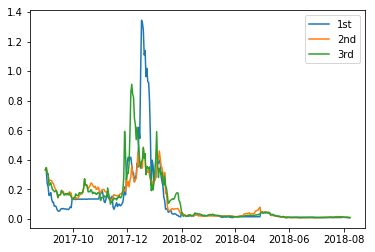

In [33]:
import numpy

# coins = ['ETH', 'BTC', 'XRP']
coins = ['ETH', 'BTC', 'XRP', 'BCH', 'EOS', 'XLM', 'LTC', 'ADA', 'MIOTA', 'USDT']

coin_dict = {}

for coin in coins:
    coin_dict[coin] = get_interests(coin_repository.CoinRepository(coin))
df = pandas.DataFrame(coin_dict)

ms = 1.0

ranks = [{}, {}, {}]

for d in pandas.date_range(end=datetime.datetime.now(), periods=12, freq='M'):
    coins_with_interests = []
    for x in coins:
        if not key_day in df[x].keys():
            print(f"{x} coin does not have a record at {d.date()}.")
            continue
        a = df[x][d.date()]
        if not numpy.isnan(a):
            coins_with_interests.append((x, df[x][d.date()]))
    ranked_coins = [k for (k, v) in sorted(coins_with_interests, key=lambda row: row[1], reverse=True) if not numpy.isnan(v)][:3]
    cs = [coin_dict[coin] for coin in ranked_coins]
    m = ms / 3
    newms = 0
    
    index = 0
    for c in cs:
        start_date = d.date()
        end_date = (start_date + pandas.tseries.offsets.MonthEnd(1)).date()

        initial_value = c[start_date]
        while start_date in c.keys() and start_date < end_date:
            current_value = c[start_date]
            interest = current_value / initial_value * m
            ranks[index][start_date] = interest
            start_date += datetime.timedelta(days=1)
            
        newms += interest
        index += 1
    ms = newms

pandas.DataFrame({
    '1st': ranks[0],
    '2nd': ranks[1],
    '3rd': ranks[2]
}).plot()

In [14]:
pandas.date_range(end=datetime.datetime.now(), periods=12, freq='M')

DatetimeIndex(['2017-08-31 20:58:15.963894', '2017-09-30 20:58:15.963894',
               '2017-10-31 20:58:15.963894', '2017-11-30 20:58:15.963894',
               '2017-12-31 20:58:15.963894', '2018-01-31 20:58:15.963894',
               '2018-02-28 20:58:15.963894', '2018-03-31 20:58:15.963894',
               '2018-04-30 20:58:15.963894', '2018-05-31 20:58:15.963894',
               '2018-06-30 20:58:15.963894', '2018-07-31 20:58:15.963894'],
              dtype='datetime64[ns]', freq='M')

In [15]:
# for d in pandas.date_range(end=datetime.datetime.now(), periods=12, freq='M'):
#     print((d + pandas.tseries.offsets.MonthEnd(1) - datetime.timedelta(days=1)).date())

In [16]:
# start_date = datetime.datetime(2017,8,1).date()
# end_date = (start_date + pandas.tseries.offsets.MonthEnd(1)).date()
# while start_date < end_date:
#     print(start_date)
#     start_date = (start_date + datetime.timedelta(days=1))

In [17]:
print(coin_repository.CoinRepository('ETH'))

In [18]:
import random
class CoinIterator:
    def __init__(self):   
        
    def __iter__(self):
        return self
    
    def __next__(self):
        return random.random()

c = CoinIterator()
for i in c:
    print(i)

IndentationError: expected an indented block (<ipython-input-18-633f502c0115>, line 5)

In [ ]:
index = [1,2,3]
values = [4,5,6]
pandas.Series(values, index).plot()

In [ ]:
import pandas

series = {
    1: 4,
    2: 5,
    3: 6
}
pandas.Series(series).plot()

In [ ]:
for i in range(60000):
    print(i)

In [ ]:
a = "Hello"
a[0:1]